#### *Predicting if the Airline Passenger is satisfied or dissatisfied based on several features related to onboarding or inflight services*

#### Loading Libraries and Data

In [1]:
import pandas as pd #Dataframe Manipulation library
import numpy as np #Data Manipulation library

#sklearn modules for Decision Trees
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import itertools

#Libraries for HyperParameter Tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Libraries for Plotting 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import plotly.graph_objects as go

import joblib  #python package to store entire logic of a variable in python

In [2]:
df = pd.read_csv("../input/airline-passenger-satisfaction/train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.describe(include = 'all')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,51951.500000,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,29994.645522,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,25975.750000,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,51951.500000,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,77927.250000,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [4]:
print("The dataset columns are: ")
print(df.columns)
print(f"\nThe datatypes are : {df.dtypes}")
print(f"\nThe size of Training dataset is: {df.shape}")

The dataset columns are: 
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

The datatypes are : Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int

#### Preprocessing the data

In [5]:
df["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [6]:
#Loading files to new environment
#le_encode = joblib.load("../input/airline-passenger-satisfaction-level-decisiontrees/class_label_encoder.joblib")
#le_encode

In [7]:
#df.satisfaction[:5]

In [8]:
##Encoding/Transforming class/categorical variables to integers which will be provided to the model
le = LabelEncoder()
le_encoded = le.fit_transform(df['satisfaction'])
print(le.classes_)
print(le_encoded)

['neutral or dissatisfied' 'satisfied']
[0 0 1 ... 0 0 0]


In [9]:
#Keeping relevant features in the dataframe
df_feat = df.iloc[0:, 2:df.shape[1]-1]  #dropping 'Unnamed: 0', 'id',satisfaction
#df.shape[1] : number of columns in dataframe and 2: df.shape[1][-1] :: All columns from col with 2nd index upto last column
print(f"Features for training data are: {df_feat.columns}")

Features for training data are: Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


In [10]:
#Splitting the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(df_feat,le_encoded,
                                                   test_size = 0.1,
                                                   random_state = 41)
#we can consider entire data as training data instead of splitting as we have seperate test data 

print(f"Shape of Input Training Dataset: {x_train.shape}")
print(f"Shape of Input Test Dataset: {x_test.shape}")
print(f"Shape of Target Training Dataset: {y_train.shape}")
print(f"Shape of Target Test Dataset: {y_test.shape}")

Shape of Input Training Dataset: (93513, 22)
Shape of Input Test Dataset: (10391, 22)
Shape of Target Training Dataset: (93513,)
Shape of Target Test Dataset: (10391,)


#### Preprocessing pipelines for Continuous and Categorical Features

* **List Comprehensions:** A pythonic way of writing **for** loops 

In [11]:
#Seperating the categorical and numerical data
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']

categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class',]
numerical_features = [feature for feature in features if feature not in categorical_features]

In [12]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ])

# Bundle preprocessing and modeling code in a pipeline
clf_rf = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',RandomForestClassifier())  # Define model
])

In [13]:
# Preprocessing of training data, fit model 
clf_rf.fit(x_train, y_train)

print(f"The score of the Random Forest Classifier model is: {clf_rf.score(x_test,y_test):0.3f}")
# Preprocessing of validation data, get predictions
y_preds = clf_rf.predict(x_test)

The score of the Random Forest Classifier model is: 0.964


#### Hyperparameter grid Tuning

In [14]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','median'],
    'classifier__n_estimators' : [200,300,400,500],  #number of decision trees in rnadome forest
    'classifier__criterion' : ['gini','entropy'],
    'classifier__max_depth' : [6,8,10,12]    
}

grid_search_rf = GridSearchCV(clf_rf, param_grid, cv = 5, verbose = 2, n_jobs=-1)

grid_search_rf.fit(x_train, y_train)
print(f"The score of the RF After Hyperparameter tuning is: {grid_search_rf.score(x_test,y_test):0.3f}")
#print(f"Best Score: {grid_search.best_score_}")
print(f"Best Parameters: {grid_search_rf.best_params_}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END classifier__criterion=gini, classifier__max_depth=6, classifier__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=  16.4s
[CV] END classifier__criterion=gini, classifier__max_depth=6, classifier__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=  16.7s
[CV] END classifier__criterion=gini, classifier__max_depth=6, classifier__n_estimators=200, preprocessor__num__imputer__strategy=median; total time=  17.0s
[CV] END classifier__criterion=gini, classifier__max_depth=6, classifier__n_estimators=300, preprocessor__num__imputer__strategy=mean; total time=  24.4s
[CV] END classifier__criterion=gini, classifier__max_depth=6, classifier__n_estimators=300, preprocessor__num__imputer__strategy=median; total time=  25.9s
[CV] END classifier__criterion=gini, classifier__max_depth=6, classifier__n_estimators=400, preprocessor__num__imputer__strategy=mean; total time=  33.6s
[CV] END c

#### Plotting Confusion Matrix to evaluate the accuracy of a classification

In [15]:
cnf_matrix = confusion_matrix(y_test,y_preds)
np.set_printoptions(precision = 2)
cnf_matrix

array([[5844,   96],
       [ 277, 4174]])

In [16]:
def plot_confusion_matrix(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  
#show data as image using plt.imshow
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
#ARANGE : returns evenly spaced values from the given interval 
# and the advantage of numpy.arange() over the normal in-built range() function is that it allows us to generate sequences of numbers that are not integers  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.xlabel('True Heart Disease Class')
    plt.ylabel('Predicted Heart Disease Class')
    plt.tight_layout()

Confusion Matrix, without Normalization
[[5844   96]
 [ 277 4174]]
Normalized Confusion Matrix
[[0.98 0.02]
 [0.06 0.94]]


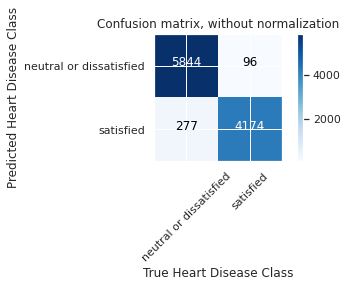

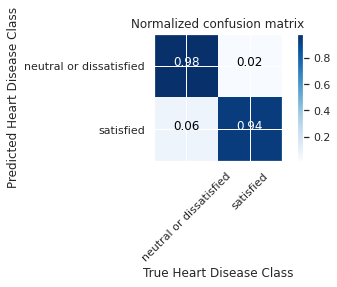

In [17]:
#Without Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, le.classes_,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Testing the performance of the model on the given test data

In [18]:
df_test = pd.read_csv("../input/airline-passenger-satisfaction/test.csv")
df_test.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


*The transformation performed on training data needs to be done on test data as well, otherwise the output maybe inconclusive*

In [19]:
#test grid_search.score(df_test,df_test['satisfaction']) passing satisfaction column directly will throw an error
#satisfaction for test data must also be label encoded
y_test_transform = le.transform(df_test["satisfaction"])
y_test_transform[0:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [20]:
test_sc = grid_search_rf.score(df_test,y_test_transform)
print(f"Accuracy of the Test data is {test_sc:0.3f}")

Accuracy of the Test data is 0.955


#### Comparing Random Forest Model and Hyperparameter Tuned Random Forest Model

In [21]:
class_models = ["rf_default","rf_tuned"]
fig = go.Figure([go.Bar(x=class_models,y=[clf_rf.score(x_test,y_test)*100,test_sc*100])])

fig.update_layout(title = 'Airline Passenger Satisfaction Level',
                 plot_bgcolor = 'grey',
                 xaxis = dict(showgrid = False), yaxis = dict(showgrid = False),
                 xaxis_title = "Random Forest Classifier Models",
                 yaxis_title = "Accuracy")
fig.show()

*Hypertuned Random Forests perform better than Random Forest with Default parameters*